In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0-dev20210512


Step 2. In a new .ipynb notebook, reproduce the results utilizing the original MNIST dataset (built into tf.keras.datasets)

In [2]:
full_mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = full_mnist.load_data()

In [3]:
full_mnist


<module 'tensorflow.keras.datasets.mnist' from 'C:\\Users\\X\\anaconda3\\envs\\tf-gpu\\lib\\site-packages\\tensorflow\\keras\\datasets\\mnist\\__init__.py'>

In [4]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

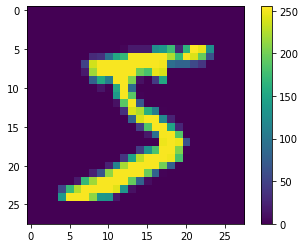

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

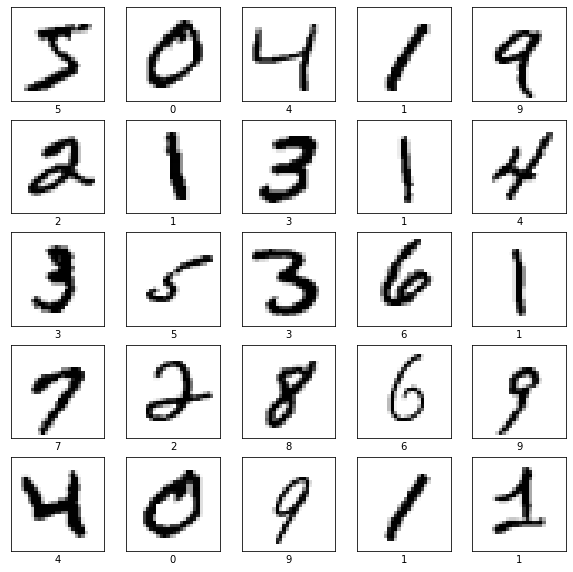

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2530 - accuracy: 0.9289
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1137 - accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0784 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0581 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0452 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0355 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0194 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.017

In [16]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTrain accuracy:', train_acc)

1875/1875 - 2s - loss: 0.0199 - accuracy: 0.9937

Train accuracy: 0.9937333464622498


In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0889 - accuracy: 0.9766

Test accuracy: 0.9765999913215637


In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

In [20]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

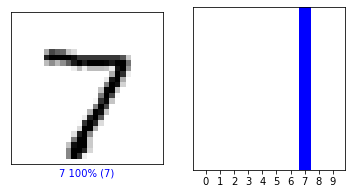

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

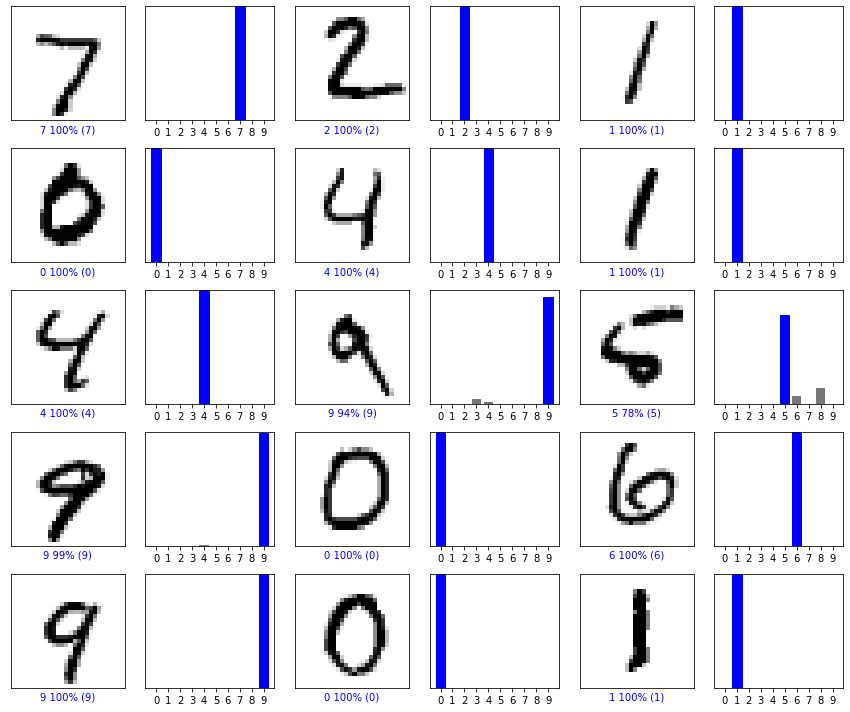

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

1875/1875 - 2s - loss: 0.0115 - accuracy: 0.9966

Train accuracy: 0.9965999722480774

313/313 - 0s - loss: 0.0803 - accuracy: 0.9793

Test accuracy: 0.9793000221252441

As expected training accuracy is higher than test accuracy 

Step 4. Choose one of the proposed modifications below:

Add another Dense layer of 128 nodes
Increase the current number of nodes in the layer to 256
Hypothesize how it would change the performance results

I chose to add another 128 nodes layer. I hypothesize that the results will be largely the same.

Step 5. Modify the model based on the chosen method and train



In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2296 - accuracy: 0.9323
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0953 - accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0397 - accuracy: 0.9872
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0314 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0275 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0233 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0195 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [26]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTrain accuracy:', train_acc)

1875/1875 - 3s - loss: 0.0104 - accuracy: 0.9964

Train accuracy: 0.996399998664856


In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0811 - accuracy: 0.9821

Test accuracy: 0.9821000099182129


Step 6. Report on the results of the modified model and if it matches your hypothesis

The train accuracy slightly fell while the test accuracy slightly rose but all within a small margine of error so I would say my hypothesis was accurate.